# 互评作业4——离群点检测之abalone数据集

1、导入Pyod库

In [13]:
import pandas as pd
import numpy as np

# Import models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
import os
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import random
import seaborn as sns

2.异常检测，生成结果文件
注：原运行代码部分因为输出行数过多所以删除了，换为以下代码（注释掉输出）

In [ ]:
path = 'E:\\abalone\\benchmarks\\'
result='E:\\abalone\\results\\'
files = os.listdir(path)
train_csv = list(files)
label=[['clf_name','out_rate','R_out_count','P_out_count','P_nor_count','AUC','AP']]
label_D=pd.DataFrame(label)
label_D.to_csv(result+"CBLOF_re.csv",mode='a',index=False, header=False)
label_D.to_csv(result+"KNN_re.csv",mode='a',index=False, header=False)
label_D.to_csv(result+"Isolation Forest_re.csv",mode='a',index=False, header=False)
label_D.to_csv(result+"Feature Bagging_re.csv",mode='a',index=False, header=False)
label_D.to_csv(result+"HBOS_re.csv",mode='a',index=False, header=False)
for i in range(len(train_csv)):
    print("正在处理的文件为：%s" %(train_csv[i]))
    df = pd.read_csv(path+train_csv[i])
    label=[]
    X=df[['V1','V2','V3','V4','V5','V6','V7']]
    count=0
    for i in range(len(df)):
        if df['ground.truth'][i]=="nominal":
            label+=[1]
        if df['ground.truth'][i]=='anomaly':
            label+=[0]
            count+=1
    Y=label
    random_state = np.random.RandomState(42)
    outliers_rate = count/len(df)
    outliers_fraction=outliers_rate
    if outliers_fraction>=0.5:
        outliers_fraction=0.4
    classifiers = {
        'CBLOF':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'KNN': KNN(contamination=outliers_fraction),
        'HBOS': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
    }
    print("算法运行中：")
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        print("算法：%s 正在运行" % (clf_name))
        clf.fit(X)
        y_pred=clf.labels_ 
        n_out=np.count_nonzero(y_pred)
        n_normal=len(y_pred)-n_out
        print("原数据的异常值数量为：%d;异常值数量：%d;正常值：%d" %(count,n_out,n_normal))
        
        for i in range(len(y_pred)):
            if(y_pred[i]==1):
                y_pred[i]=0
            else:
                y_pred[i]=1
        AUC=roc_auc_score(Y, y_pred)
        AP=average_precision_score(Y, y_pred)
        list=[[clf_name,outliers_rate,count,n_out,n_normal,AUC,AP]]
        list_d=pd.DataFrame(list)
        list_d.to_csv(result+clf_name+"_re.csv",mode='a',index=False, header=False)
        print("AUC=%4lf;AP=%4lf" %(AUC,AP))
        print("算法：%s 运行完毕" % (clf_name))

部分输出如下：
正在处理的文件为：abalone_benchmark_1798.csv
算法运行中：
算法：CBLOF 正在运行
原数据的异常值数量为：128;异常值数量：128;正常值：1145
AUC=0.491877;AP=0.897984
算法：CBLOF 运行完毕
算法：KNN 正在运行
原数据的异常值数量为：128;异常值数量：128;正常值：1145
AUC=0.491877;AP=0.897984
算法：KNN 运行完毕
算法：HBOS 正在运行
原数据的异常值数量为：128;异常值数量：118;正常值：1155
AUC=0.509273;AP=0.901131
算法：HBOS 运行完毕
算法：Isolation Forest 正在运行
原数据的异常值数量为：128;异常值数量：128;正常值：1145
AUC=0.500563;AP=0.899552
算法：Isolation Forest 运行完毕
算法：Feature Bagging 正在运行
原数据的异常值数量为：128;异常值数量：128;正常值：1145
AUC=0.478848;AP=0.895642
算法：Feature Bagging 运行完毕

3.加载生成的5种csv文件 方法：CBLOF，Feature Bagging,HBOS,Isolation Forest,KNN

In [6]:
df_cblof=pd.read_csv(path_new + '/' + 'CBLOF_re.csv')
#df_cblof.info()
df_fb=pd.read_csv(path_new + '/' + 'Feature Bagging_re.csv')
df_fb.info()
df_hbos=pd.read_csv(path_new + '/' + 'HBOS_re.csv')
# df_hbos.info()
df_if=pd.read_csv(path_new + '/' + 'Isolation Forest_re.csv')
# df_if.info()
df_knn=pd.read_csv(path_new + '/' + 'KNN_re.csv')
# df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   clf_name     1725 non-null   object 
 1   out_rate     1725 non-null   float64
 2   R_out_count  1725 non-null   int64  
 3   P_out_count  1725 non-null   int64  
 4   P_nor_count  1725 non-null   int64  
 5   AUC          1725 non-null   float64
 6   AP           1725 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 94.5+ KB


4.数据描述 5种结果分别描述其属性（离群点率，离群点数量，正常点数量，AUC，AP）的数量、均值、最值，中位数。

In [7]:
df_cblof.describe()

,out_rate,R_out_count,P_out_count,P_nor_count,AUC,AP
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,0.109018,188.256812,174.395942,1456.262029,0.596165,0.906977
std,0.168660,301.943009,270.840218,440.409298,0.133660,0.151503
min,0.001059,2.000000,2.000000,718.000000,0.392662,0.498271
25%,0.005274,10.000000,10.000000,980.000000,0.499116,0.921828
50%,0.050164,47.000000,47.000000,1776.000000,0.568261,0.987218
75%,0.100191,210.000000,210.000000,1886.000000,0.621023,0.995226
max,0.529131,999.000000,943.000000,1886.000000,1.000000,1.000000


In [8]:
df_fb.describe()

,out_rate,R_out_count,P_out_count,P_nor_count,AUC,AP
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,0.109018,188.256812,174.395942,1456.262029,0.563042,0.899286
std,0.168660,301.943009,270.840218,440.409298,0.117152,0.159092
min,0.001059,2.000000,2.000000,718.000000,0.383797,0.507889
25%,0.005274,10.000000,10.000000,980.000000,0.497349,0.913862
50%,0.050164,47.000000,47.000000,1776.000000,0.526140,0.976853
75%,0.100191,210.000000,210.000000,1886.000000,0.577329,0.994709
max,0.529131,999.000000,943.000000,1886.000000,1.000000,1.000000


In [9]:
df_hbos.describe()

,out_rate,R_out_count,P_out_count,P_nor_count,AUC,AP
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,0.109018,188.256812,171.997101,1458.660870,0.598834,0.905006
std,0.168660,301.943009,267.850335,439.276396,0.130017,0.163394
min,0.001059,2.000000,0.000000,719.000000,0.423424,0.449267
25%,0.005274,10.000000,10.000000,1004.000000,0.499073,0.928453
50%,0.050164,47.000000,47.000000,1776.000000,0.547614,0.984926
75%,0.100191,210.000000,206.000000,1886.000000,0.653636,0.995226
max,0.529131,999.000000,943.000000,1908.000000,1.000000,1.000000


In [10]:
df_if.describe()

,out_rate,R_out_count,P_out_count,P_nor_count,AUC,AP
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,0.109018,188.256812,174.394783,1456.263188,0.578963,0.896261
std,0.168660,301.943009,270.840912,440.409436,0.127149,0.174490
min,0.001059,2.000000,2.000000,718.000000,0.376721,0.444953
25%,0.005274,10.000000,10.000000,980.000000,0.497338,0.920824
50%,0.050164,47.000000,47.000000,1776.000000,0.545228,0.983880
75%,0.100191,210.000000,210.000000,1886.000000,0.611029,0.995226
max,0.529131,999.000000,943.000000,1887.000000,1.000000,1.000000


In [11]:
df_knn.describe()

,out_rate,R_out_count,P_out_count,P_nor_count,AUC,AP
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,0.109018,188.256812,174.382029,1456.275942,0.627212,0.922874
std,0.168660,301.943009,270.827621,440.402931,0.163513,0.126834
min,0.001059,2.000000,2.000000,718.000000,0.367751,0.575412
25%,0.005274,10.000000,10.000000,980.000000,0.499116,0.927897
50%,0.050164,47.000000,47.000000,1776.000000,0.594586,0.989484
75%,0.100191,210.000000,210.000000,1886.000000,0.678543,0.995226
max,0.529131,999.000000,943.000000,1887.000000,1.000000,1.000000


5.可视化之密度图

AUC密度曲线
蓝色-CBLOF
橙色-FB
绿色-HBOS
红色-IF
紫色-KNN

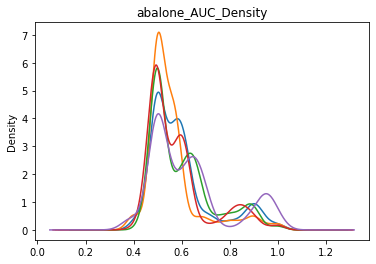

In [60]:
import matplotlib.pyplot as plt
df_cblof['AUC'].plot(kind='kde',label='CBLOF')
df_fb['AUC'].plot(kind='kde',label='FB')
df_hbos['AUC'].plot(kind='kde',label='HBOS')
df_if['AUC'].plot(kind='kde',label='IF')
df_knn['AUC'].plot(kind='kde',label='KNN')
plt.title("abalone_AUC_Density")
plt.show()

AP密度曲线
蓝色-CBLOF
橙色-FB
绿色-HBOS
红色-IF
紫色-KNN

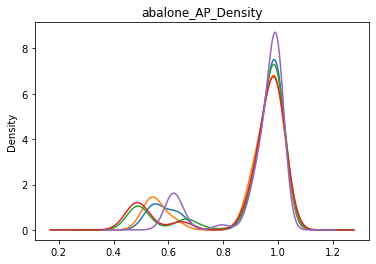

In [61]:
df_cblof['AP'].plot(kind='kde')
df_fb['AP'].plot(kind='kde')
df_hbos['AP'].plot(kind='kde')
df_if['AP'].plot(kind='kde')
df_knn['AP'].plot(kind='kde')
plt.title("abalone_AP_Density")
plt.show()

将同一种方法的AUC和AP画在一张图中
以CBLOF和FB为例

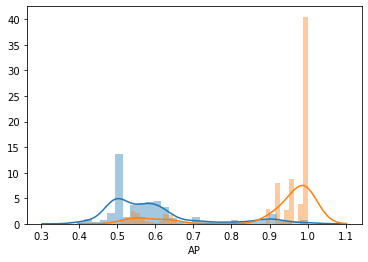

In [42]:
sns.distplot(df_cblof['AUC'])
sns.distplot(df_cblof['AP'])

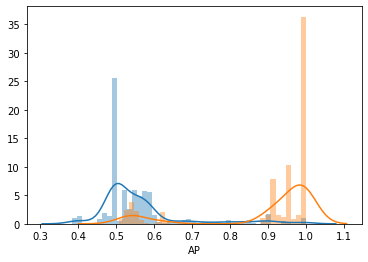

In [43]:
sns.distplot(df_fb['AUC'])
sns.distplot(df_fb['AP'])

6.可视化之矩阵图

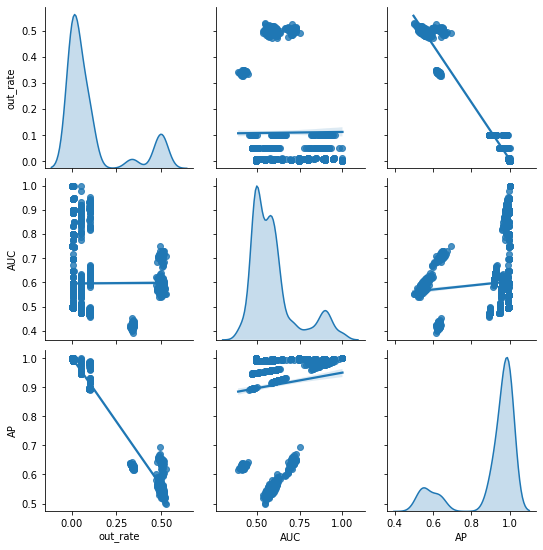

In [45]:
g = sns.pairplot(df_cblof,
                 kind="reg",diag_kind="kde",
                 vars=["out_rate", "AUC", "AP"])

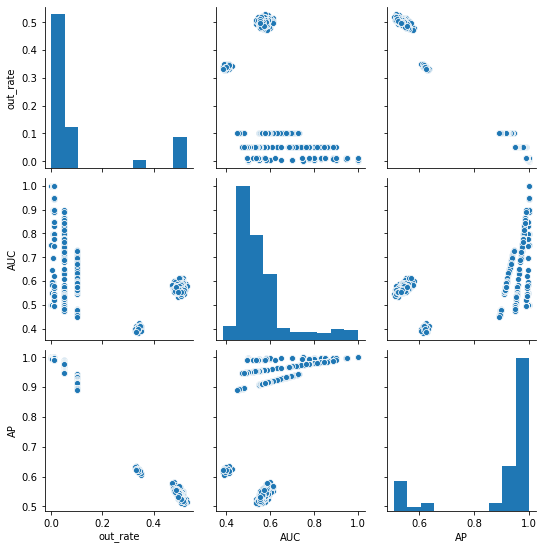

In [46]:
g = sns.pairplot(df_fb,
                 vars=["out_rate", "AUC", "AP"])

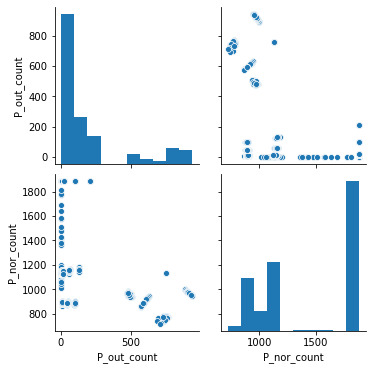

In [47]:
g = sns.pairplot(df_if,
                 vars=["P_out_count", "P_nor_count"])

7.可视化之散点图

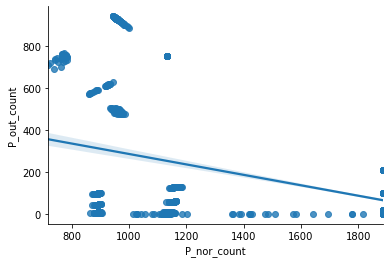

In [50]:
sns.regplot(x="P_nor_count", y="P_out_count", data=df_cblof)
sns.despine();

8.可视化之盒图

e:\python37\lib\site-packages\ipykernel_launcher.py:63: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


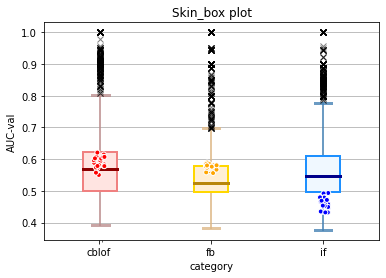

In [55]:
import matplotlib.pyplot as plt
#盒图
def drawbox2():
    tang_data = [df_cblof['AUC'],df_fb['AUC'],df_if['AUC']]
    df_tang=pd.DataFrame({'category':['cblof','cblof','cblof','cblof','cblof','cblof','cblof','cblof',
                                      'cblof','cblof','cblof','cblof','cblof','cblof','cblof','cblof',
                                      'cblof','cblof','cblof','cblof'
                                      ,'fb', 'fb', 'fb', 'fb', 'fb', 'fb', 'fb', 'fb', 'fb', 'fb',
                                      'fb', 'fb', 'fb', 'fb', 'fb', 'fb', 'fb', 'fb', 'fb', 'fb',
                                       'if','if','if','if','if','if','if','if','if','if','if',
                                      'if','if','if','if','if','if','if','if','if'
                                      ],
                          'auc':[df_cblof.iloc[0,5],df_cblof.iloc[1,5],df_cblof.iloc[2,5],df_cblof.iloc[3,5],
                               df_cblof.iloc[4,5],df_cblof.iloc[5,5],df_cblof.iloc[6,5],df_cblof.iloc[7,5],
                               df_cblof.iloc[8,5],df_cblof.iloc[9,5],df_cblof.iloc[10,5],df_cblof.iloc[11,5],
                               df_cblof.iloc[12,5],df_cblof.iloc[13,5],df_cblof.iloc[14,5],df_cblof.iloc[15,5],
                               df_cblof.iloc[16,5],df_cblof.iloc[17,5],df_cblof.iloc[18,5],df_cblof.iloc[19,5],
                               df_fb.iloc[0,5],df_fb.iloc[1,5],df_fb.iloc[2,5],df_fb.iloc[3,5],
                               df_fb.iloc[4,5],df_fb.iloc[5,5],df_fb.iloc[6,5],df_fb.iloc[7,5],
                               df_fb.iloc[8,5],df_fb.iloc[9,5],df_fb.iloc[10,5],df_fb.iloc[11,5],
                               df_fb.iloc[12,5],df_fb.iloc[13,5],df_fb.iloc[14,5],df_fb.iloc[15,5],
                               df_fb.iloc[16,5],df_fb.iloc[17,5],df_fb.iloc[18,5],df_fb.iloc[19,5],
                               df_if.iloc[10,5],df_if.iloc[11,5],df_if.iloc[12,5],df_if.iloc[13,5],
                               df_if.iloc[24,5],df_if.iloc[25,5],df_if.iloc[26,5],df_if.iloc[27,5],
                               df_if.iloc[38,5],df_if.iloc[39,5],df_if.iloc[0,5],df_if.iloc[1,5],
                               df_if.iloc[42,5],df_if.iloc[43,5],df_if.iloc[44,5],df_if.iloc[45,5],
                               df_if.iloc[16,5],df_if.iloc[17,5],df_if.iloc[18,5],df_if.iloc[19,5],
                              ]})
    df_tang.to_csv('df_tang.csv')

    #fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    #fig,axes=plt.subplots(plt.subplots(nrows=1, ncols=1, figsize=(12, 5)))

    #axes[0].violinplot(tang_data, showmeans=False, showmedians=True)
    #axes[0].set_title('NPIme_violin plot')

    #v = axes[0].violinplot(tang_data, showmeans=False, showmedians=True,color=['red','blue'])
    #print(v)


    # 绘制分类散点图
    # INPUT  -> 分组列, 统计列

    # 添加分布散点图 boxplot with jitter
    color_scatter= ['red','orange', 'blue']    # 散点颜色
    color_boxes = ['mistyrose','papayawhip','aliceblue'] # 盒图填充颜色
    #axes[1] = sns.boxplot(x='category', y='r', data=df_tang,saturation=1,linewidth=2,width=3)
    #plt.show()

    ###############################################################

    # 通过stripplot添加分布散点图，jitter设置数据间距
    axes = sns.stripplot(x='category',  # 设置分组统计字段
                         y='auc',  # 数据分布统计字段
                            # 这里xy数据对调，会使得散点图横向分布
                            order=['cblof','fb','if'],
                            jitter=0.05,  # jitter代表设置抖动
                            edgecolor='w', linewidth=1, marker='o', data=df_tang,
                            palette=color_scatter)

    f = axes.boxplot(tang_data,patch_artist=True,positions=(0.01,1,2),showfliers=None)
    #plt.setp(f, xticks=[y + 1 for y in range(len(tang_data))], xticklabels=['l2r', 'l-r'])
    axes.set_xticks([0.03,1],['cblof','fb','if'])
    # 这里共有四个box
    color_edge=['lightcoral','gold','dodgerblue']
    for box, cb,ce in zip(f['boxes'], color_boxes,color_edge):
        # 箱体边框颜色
        box.set(color=ce, linewidth=2)
        # 箱体内部填充颜色
        box.set(facecolor=cb)

    color_w=['rosybrown','rosybrown','burlywood','burlywood','steelblue','steelblue']
    # 这里设置的是各个box的其他属性
    for whisker,cw in zip(f['whiskers'],color_w):
        whisker.set(color=cw, linewidth=2,alpha=0.8)
    color_c = ['rosybrown','rosybrown','burlywood','burlywood','steelblue','steelblue']
    for cap,cc in zip(f['caps'],color_c):
        cap.set(color=cc, linewidth=3,alpha=0.8)
    #中位线
    color_median=['darkred','darkgoldenrod','DarkBlue']
    for median,cm in zip(f['medians'],color_median):
        median.set(color=cm, linewidth=3)

    for flier in f['fliers']:
        flier.set(marker='x', color='w', alpha=0.5)
    #####################################################
    axes.set_title('Skin_box plot')

    # for ax in axes:
    # 对y轴加上网格
    axes.yaxis.grid(True)
    axes.set_xticks([y + 1 for y in range(len(tang_data))])
    # 对每个图加上xticks操作
    plt.ylabel('AUC-val')
    plt.setp(axes, xticks=[y for y in range(len(tang_data))], xticklabels=['cblof', 'fb',
                                                                           'if'])
    plt.plot()
    plt.show()

drawbox2()